In [25]:
#importing Libraies
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

In [26]:
#load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Salary Distribution by Job Title

Filter our data to only include salary values from the India.

In [27]:
df_in = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

### Convert USD to Ruppess

Convert the salary_year_avg from USD to INR using forex-python  

In [28]:
from forex_python.converter import CurrencyRates

# Display floats normally (not in scientific notation)
pd.options.display.float_format = '{:,.2f}'.format

#Initialize the converter
c = CurrencyRates()

# Get exchange rate once
rate = c.get_rate('USD', 'INR')

#Convert to USD to INR
df_in['salary_ruppe'] = (df_in['salary_year_avg'] * rate).round(0).astype(int)
df_in

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_ruppe
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,"79,200.00",NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc...",6784755
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,"156,500.00",NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'...",13406745
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,"147,500.00",NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi...",12635750
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,"79,200.00",NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur...",6784755
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,"114,516.00",NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['...",9810139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783733,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:11,False,False,India,year,"157,500.00",NaN,Publicis Groupe,"[aws, spark, tableau, cognos, excel, powerpoin...","{'analyst_tools': ['tableau', 'cognos', 'excel...",13492411
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,"111,175.00",NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}",9523929
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,"157,500.00",NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat...",13492411
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,"64,800.00",NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli...",5551163


In [29]:
job_titles = df_in['job_title_short'].value_counts().index[:6].tolist()

#filter the df for the top 6 job titles
df_in_top6 = df_in[df_in['job_title_short'].isin(job_titles)]

#order the job title by median salary

job_order = df_in_top6.groupby('job_title_short')['salary_ruppe'].median().sort_values(ascending=False).index 

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

#### Plot Salary Distributions

Plot the top 6 job titles salary distributions using a box plot

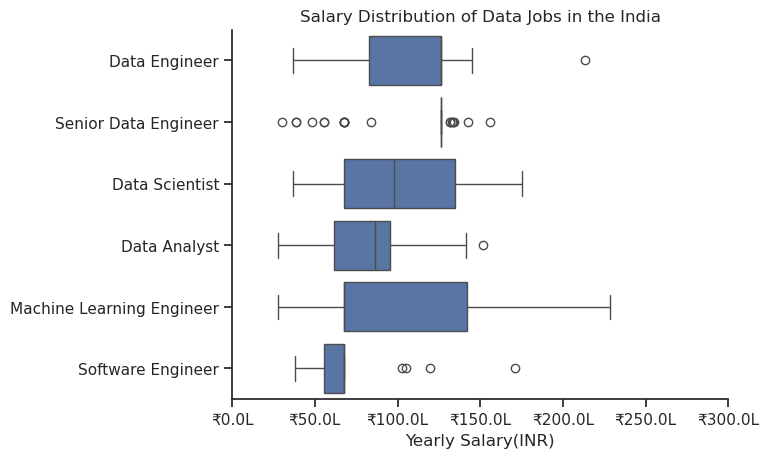

In [38]:
# Set font family that supports ₹
plt.rcParams['font.family'] = 'DejaVu Sans'

sns.boxplot(data=df_in_top6, x= 'salary_ruppe', y= 'job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distribution of Data Jobs in the India')
plt.xlabel('Yearly Salary(INR)')
plt.ylabel('')
plt.xlim(0,30000000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'₹{y / 1e5:.1f}L')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

#### Plot Salary Distribution for Data Scientist in India

In [31]:
#only get data Scientist jobs in the India
df_ds_in = df_in[df_in['job_title_short'] == 'Data Scientist'].copy()
df_ds_in

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_ruppe
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,"114,516.00",NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['...",9810139
9143,Data Scientist,Manager - Data Science,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-12 13:28:49,False,False,India,year,"79,200.00",NaN,BitGo,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",6784755
16358,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-07-19 13:12:35,False,False,India,year,"157,500.00",NaN,Silent Eight,"[python, sql, bash, postgresql, pandas, pyspar...","{'async': ['jira', 'confluence'], 'databases':...",13492411
27440,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-15 13:27:09,False,False,India,year,"157,500.00",NaN,"AppZen, Inc.","[python, r]","{'programming': ['python', 'r']}",13492411
30999,Data Scientist,Data Scientist,"Noida, Uttar Pradesh, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:07,False,False,India,year,"157,500.00",NaN,HashiCorp,"[python, aws, numpy, pandas, tensorflow, pytor...","{'cloud': ['aws'], 'libraries': ['numpy', 'pan...",13492411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762560,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-12 20:29:35,False,False,India,year,"70,000.00",NaN,Avaloq,"[python, r, sql, java, mysql, sql server, reds...","{'analyst_tools': ['tableau', 'power bi'], 'cl...",5996627
762634,Data Scientist,Data Modeller,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-23 20:30:17,True,False,India,year,"64,800.00",NaN,Capco,"[sql, python, scala, hadoop]","{'libraries': ['hadoop'], 'programming': ['sql...",5551163
768729,Data Scientist,Lead Data Modeler/Developer for Business Analy...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-04 01:33:21,False,False,India,year,"79,200.00",NaN,Bosch Group,[sql],{'programming': ['sql']},6784755
770989,Data Scientist,"Data Scientist –ML, DL, Python","Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-21 01:12:02,False,False,India,year,"157,500.00",NaN,Capco,"[python, r, sql, t-sql, sql server, snowflake,...","{'analyst_tools': ['tableau', 'power bi', 'qli...",13492411


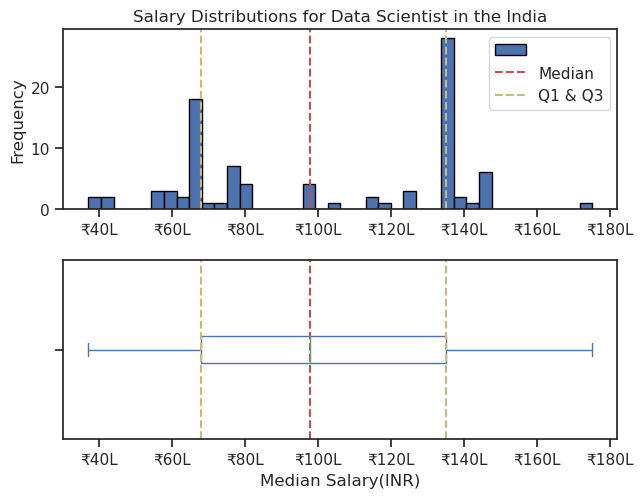

In [32]:
# Set font family that supports ₹
plt.rcParams['font.family'] = 'DejaVu Sans'

# plot histogram and boxplot for df_ds_in['salary_ruppe'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_ds_in['salary_ruppe'].plot(kind='hist', ax=ax[0], bins=40, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Scientist in the India')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '₹{0:g}L'.format(x/1e5)))
# lines
ax[0].axvline(df_ds_in['salary_ruppe'].median(), color='r', linestyle='--')
ax[0].axvline(df_ds_in['salary_ruppe'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_ds_in['salary_ruppe'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_ds_in['salary_ruppe'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary(INR)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '₹{0:g}L'.format(x/1e5)))
# lines
ax[1].axvline(df_ds_in['salary_ruppe'].median(), color='r', linestyle='--')
ax[1].axvline(df_ds_in['salary_ruppe'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_ds_in['salary_ruppe'].quantile(0.75), color='y', linestyle='--')
plt.show()

### Investigate Median Salary Vs Skill for Data Analysts
Filters the original dataset to only get rows where the job title is 'Data Scientist' and the country is 'India'


In [33]:
df_ds_in = df_in.explode('job_skills')

df_ds_in[['salary_ruppe','job_skills']].head()


,salary_ruppe,job_skills
1209,6784755,python
1209,6784755,opencv
1209,6784755,tensorflow
1209,6784755,pytorch
1209,6784755,keras


#### Determine The Highest Paid Skills and Most Demanded Skills

In [47]:
df_ds_top_pay = df_ds_in.groupby('job_skills')['salary_ruppe'].agg(['count', 'median']).sort_values(by ='median', ascending=False)

df_ds_top_pay = df_ds_top_pay.head(10)

df_ds_top_pay


,count,median
job_skills,,
gdpr,2,"14,030,565.00"
watson,2,"13,492,411.00"
cognos,1,"13,492,411.00"
haskell,1,"13,492,411.00"
rshiny,1,"13,278,246.00"
microstrategy,3,"12,635,750.00"
linux,23,"12,635,750.00"
kubernetes,42,"12,635,750.00"
kotlin,3,"12,635,750.00"


In [48]:
df_ds_skills = df_ds_in.groupby('job_skills')['salary_ruppe'].agg(['count','median']).sort_values(by='count', ascending=False)

df_ds_skills = df_ds_skills.head(10).sort_values(by='median',ascending=False)

df_ds_skills

,count,median
job_skills,,
spark,179,"12,635,750.00"
java,117,"12,635,750.00"
kafka,82,"12,635,750.00"
hadoop,108,"12,067,826.50"
python,316,"9,723,102.00"
sql,310,"9,624,672.00"
tableau,94,"9,523,929.00"
aws,147,"9,423,271.00"
azure,123,"9,050,623.00"


#### Creates two horizontal bar charts:

1. Displays the highest paid skills
2. Shows the most in demand skills

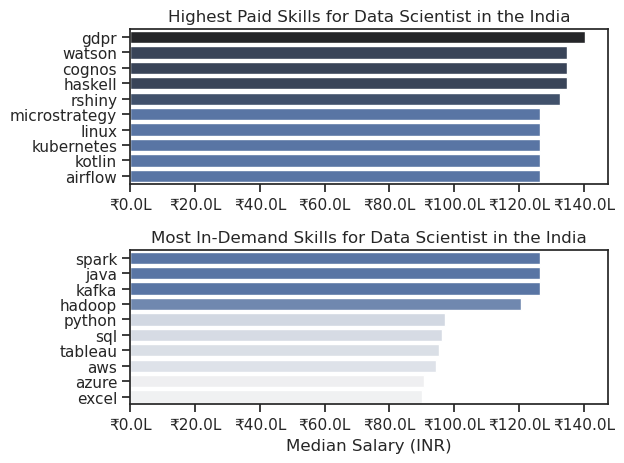

In [49]:
# Set font family that supports ₹
plt.rcParams['font.family'] = 'DejaVu Sans'

fig, ax = plt.subplots(2, 1) 

# Top 10 Highest Paid Skills for Data Scientist
sns.barplot(data=df_ds_top_pay, x='median', y=df_ds_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().set_visible(False)
# original code:
# df_ds_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Scientist in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{y / 1e5:.1f}L'))


# Top 10 Most In-Demand Skills for Data Scientist')
sns.barplot(data=df_ds_skills, x='median', y=df_ds_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().set_visible(False)
# original code:
# df_ds_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Scientist in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (INR)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{y / 1e5:.1f}L'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()